<a href="https://colab.research.google.com/github/LyaRB/SenalesySistemas/blob/main/Parcial%203/Punto_1_sistema_lazo_abierto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import sympy as sym
sym.init_printing()
import matplotlib.pyplot as plt


Sistema Subamortiguado

In [3]:
#definir las variables de la función de transferencia
L, C, R = sym.symbols("L C R", real = True, positive = True)
s = sym.symbols("s", complex = True)

#sistema subamortiguado RLC
#forma canónica del SLIT
a2 = L*C
a1 = L/R
a0 = 1

k = 1/a0 #ganancia
Wn = sym.sqrt(a0/a2) #frecuencia natural no amortiguada
FA = a1 /(2*sym.sqrt(a0*a2)) #factor de amortiguamiento
Wd = Wn*sym.sqrt(1-FA**2) #frecuencia natural amortiguada

H = (k*Wn**2)/(s**2 + 2*FA*Wn*s + Wn**2)
print("La función de transferencia es: ")
H

La función de transferencia es: 


        1.0         
────────────────────
    ⎛ 2    s     1 ⎞
C⋅L⋅⎜s  + ─── + ───⎟
    ⎝     C⋅R   C⋅L⎠

In [4]:
#cálculo de los polos
p1 = -FA*Wn + 1j*Wn*sym.sqrt(1-FA**2)
p2 = -FA*Wn - 1j*Wn*sym.sqrt(1-FA**2)
print("Los polos son: ")
print(p1)
print(p2)

Los polos son: 
-1/(2*C*R) + 1.0*I*sqrt(1 - L/(4*C*R**2))/(sqrt(C)*sqrt(L))
-1/(2*C*R) - 1.0*I*sqrt(1 - L/(4*C*R**2))/(sqrt(C)*sqrt(L))


In [5]:
#en un sistema subamortiguado el factor de amortiguamiento debe ser mayor a 0 y menor a 1
#reemplazamos valores
values = {L: 40, R:20, C:100*10**-3}
values

{C: 0.1, L: 40, R: 20}

In [6]:
#para calcular los polocs y ceros
print('p1=',p1.subs(values))
print('p2=',p2.subs(values))
print('FA=',FA.subs(values))
print('omega_n=',Wn.subs(values))

p1= -0.25 + 0.433012701892219*I
p2= -0.25 - 0.433012701892219*I
FA= 0.158113883008419*sqrt(10)
omega_n= 0.158113883008419*sqrt(10)


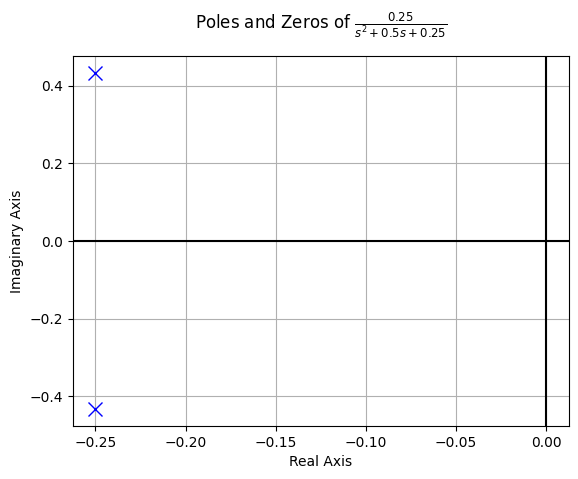

In [7]:
#gráfica polos y ceros paquete de control de sympy
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot, bode_plot, impulse_response_plot, step_response_plot, ramp_response_plot
num,den=sym.fraction(H.subs(values))

tf1 = TransferFunction(num, den, s)#numerados y denomirador función de transferencia con valores evaluados de RLC
pole_zero_plot(tf1)

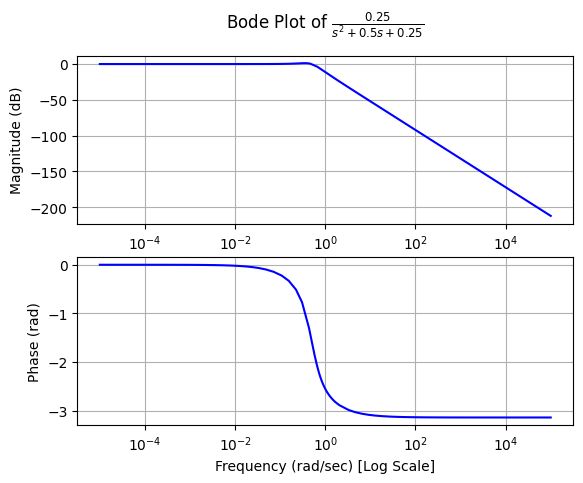

In [8]:
bode_plot(tf1)

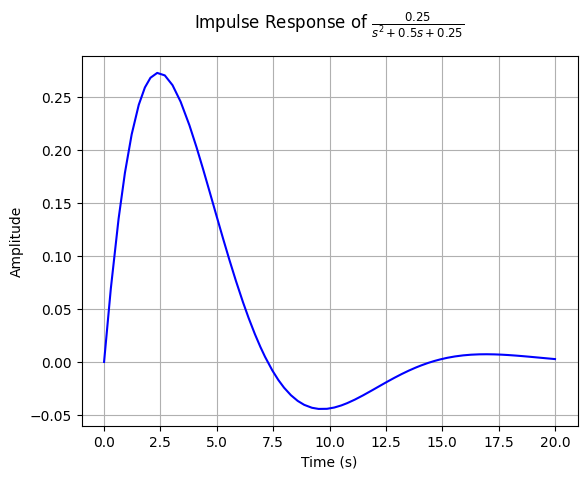

In [9]:
impulse_response_plot(tf1,upper_limit=5/(FA.subs(values)*Wn.subs(values)))

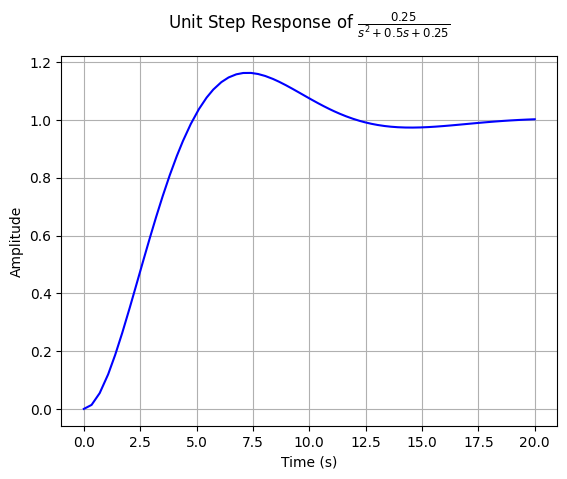

In [10]:
step_response_plot(tf1,upper_limit=5/(FA.subs(values)*Wn.subs(values)))


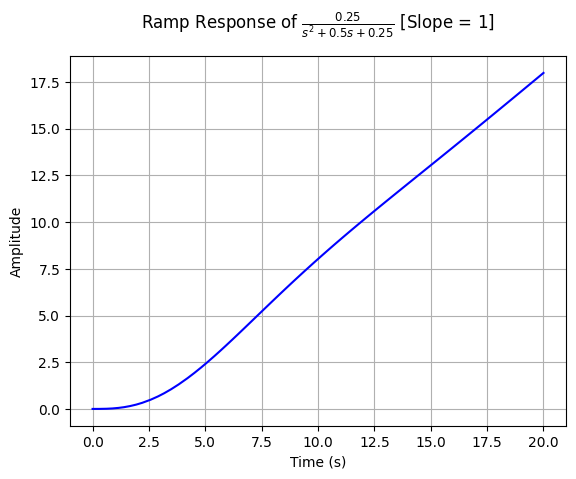

In [11]:
ramp_response_plot(tf1,upper_limit=5/(FA.subs(values)*Wn.subs(values)))

Sistema Sobreamortiguado

In [12]:
#sistema sobreamortiguado masa resorte (teniendo en cuenta que ambos sistemas son equivalentes)
#forma canónica del SLIT

m, c, K = sym.symbols("m c K", real = True, positive = True)
A2 = m
A1 = c
A0 = K

k = 1/A0 #ganancia
wn = sym.sqrt(A0/A2) #frecuencia natural no amortiguada
fa = A1 /(2*sym.sqrt(A0*A2)) #factor de amortiguamiento
wd = wn*sym.sqrt(1-fa**2) #frecuencia natural amortiguada

G = (k*wn**2)/(s**2 + 2*fa*wn*s + wn**2)
print("La función de transferencia es: ")
G

La función de transferencia es: 


       1        
────────────────
  ⎛K   c⋅s    2⎞
m⋅⎜─ + ─── + s ⎟
  ⎝m    m      ⎠

In [13]:
p1 = -fa*wn + 1j*wn*sym.sqrt(1-fa**2)
p2 = -fa*wn - 1j*wn*sym.sqrt(1-fa**2)
p1

              ___________      
             ╱        2        
            ╱        c         
1.0⋅ⅈ⋅√K⋅  ╱   1 - ─────       
         ╲╱        4⋅K⋅m     c 
───────────────────────── - ───
            √m              2⋅m

In [14]:
#en un sistema sobreamortiguado el factor de amortiguamiento debe ser mayor a 1
#reemplazamos valores
values1 = {m:1, c:4, K:1}
values1

{K: 1, c: 4, m: 1}

In [15]:
print('p1=',p1.subs(values1))
print('p2=',p2.subs(values1))
print('xi=',fa.subs(values1))
print('omega_n=',wn.subs(values1))

p1= -2 - 1.0*sqrt(3)
p2= -2 + 1.0*sqrt(3)
xi= 2
omega_n= 1


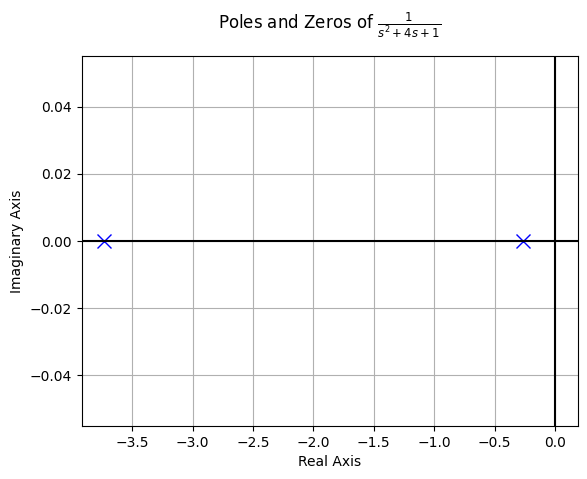

In [16]:
#gráfica polos y ceros paquete de control de sympy
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot, bode_plot, impulse_response_plot, step_response_plot
num,den=sym.fraction(G.subs(values1))

tf2 = TransferFunction(num, den, s)#numerados y denomirador función de transferencia con valores evaluados de RLC
pole_zero_plot(tf2)

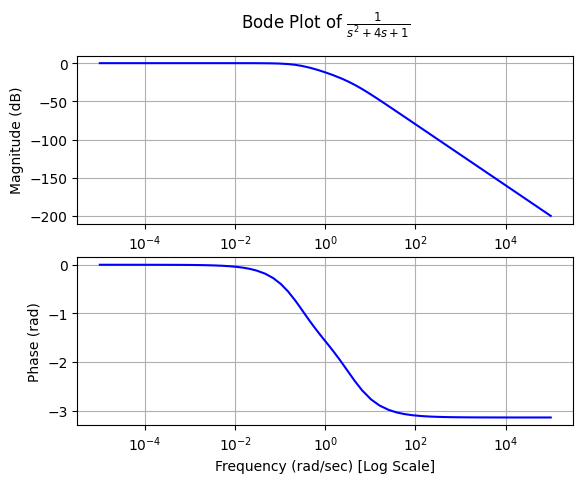

In [17]:
bode_plot(tf2)

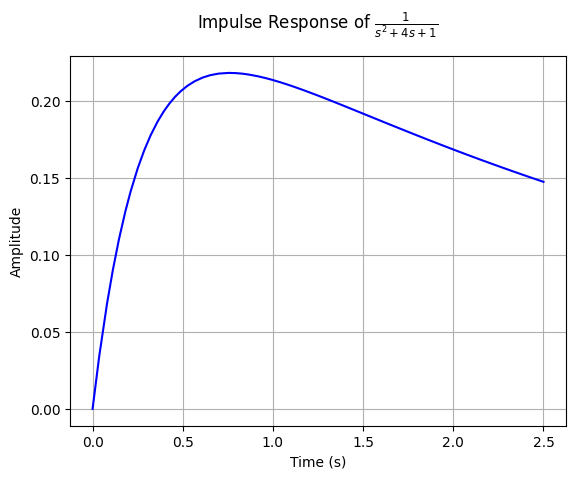

In [18]:
impulse_response_plot(tf2,upper_limit=5/(fa.subs(values1)*wn.subs(values1)))

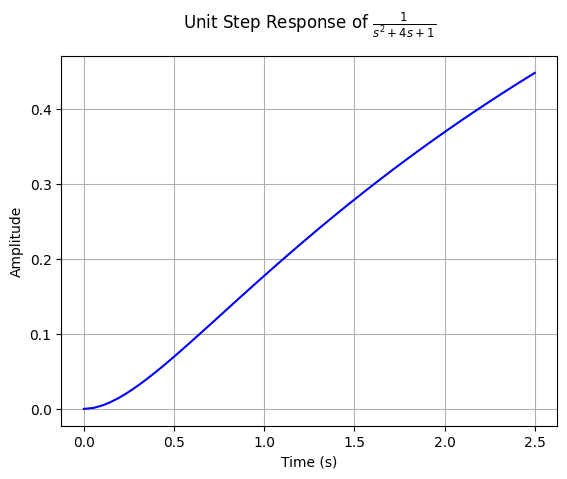

In [19]:
step_response_plot(tf2,upper_limit=5/(fa.subs(values1)*wn.subs(values1)))

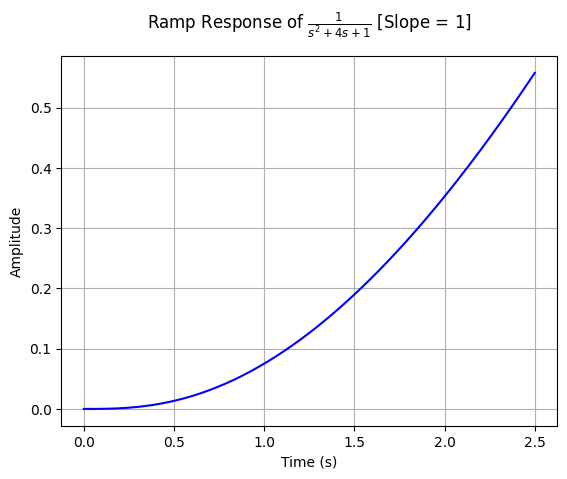

In [20]:
ramp_response_plot(tf2,upper_limit=5/(fa.subs(values1)*wn.subs(values1)))

Sistema de amortiguamiento crítico

In [21]:
#definir las variables de la función de transferencia
L1, C1, R1 = sym.symbols("L1 C1 R1", real = True, positive = True)
s = sym.symbols("s", complex = True)

#sistema de amortiguamiento crítco RLC
#forma canónica del SLIT
a_2 = L1*C1
a_1 = L1/R1
a_0 = 1

k = 1/a_0 #ganancia
W_n = sym.sqrt(a_0/a_2) #frecuencia natural no amortiguada
Fa = a_1 /(2*sym.sqrt(a_0*a_2)) #factor de amortiguamiento
Wd = Wn*sym.sqrt(1-Fa**2) #frecuencia natural amortiguada

F = (k*W_n**2)/(s**2 + 2*Fa*W_n*s + W_n**2)
print("La función de transferencia es: ")
F

La función de transferencia es: 


           1.0            
──────────────────────────
      ⎛ 2     s       1  ⎞
C₁⋅L₁⋅⎜s  + ───── + ─────⎟
      ⎝     C₁⋅R₁   C₁⋅L₁⎠

In [22]:
#cálculo de los polos
p1 = -Fa*W_n + 1j*W_n*sym.sqrt(1-Fa**2)
p2 = -Fa*W_n - 1j*Wn*sym.sqrt(1-Fa**2)
print("Los polos son: ")
print(p1)
print(p2)

Los polos son: 
-1/(2*C1*R1) + 1.0*I*sqrt(1 - L1/(4*C1*R1**2))/(sqrt(C1)*sqrt(L1))
-1/(2*C1*R1) - 1.0*I*sqrt(1 - L1/(4*C1*R1**2))/(sqrt(C)*sqrt(L))


In [23]:
#en un sistema de amotiguamiento crítico el factor de amortiguamiento debe ser igual a 1
#reemplazamos valores
values2 = {L1:10, C1:100*10**-3, R1:5}
values2

{C₁: 0.1, L₁: 10, R₁: 5}

In [24]:
print('p1=',p1.subs(values2))
print('p2=',p2.subs(values2))
print('Fa=',Fa.subs(values2))
print('omega_n=',W_n.subs(values2))

p1= -1.00000000000000
p2= -1.00000000000000
Fa= 0.316227766016838*sqrt(10)
omega_n= 0.316227766016838*sqrt(10)


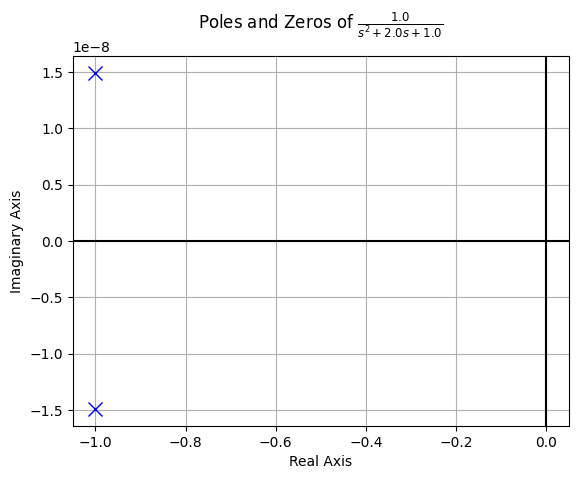

In [25]:
#gráfica polos y ceros paquete de control de sympy
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot, bode_plot, impulse_response_plot, step_response_plot
num,den=sym.fraction(F.subs(values2))

tf3 = TransferFunction(num, den, s)#numerados y denomirador función de transferencia con valores evaluados de RLC
pole_zero_plot(tf3)

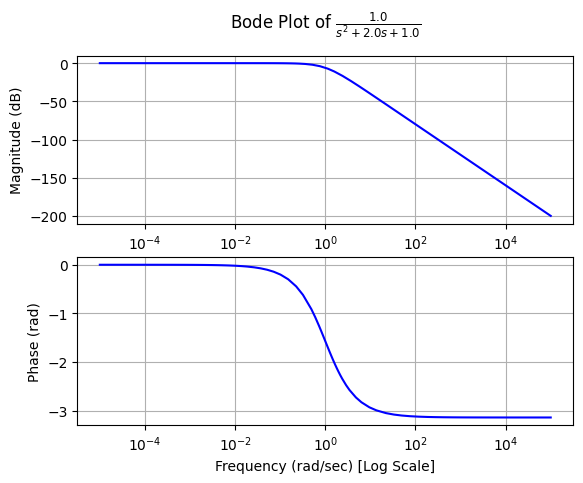

In [26]:
bode_plot(tf3)

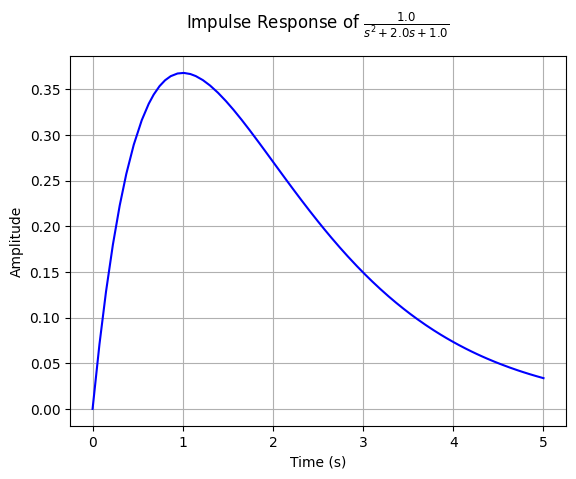

In [27]:
impulse_response_plot(tf3,upper_limit=5/(Fa.subs(values2)*W_n.subs(values2)))

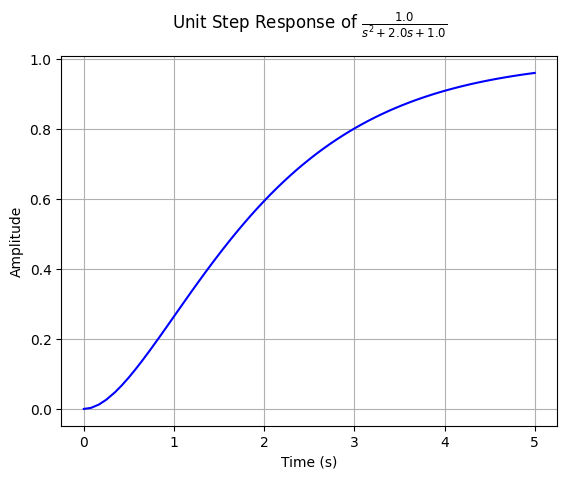

In [28]:
step_response_plot(tf3,upper_limit=5/(Fa.subs(values2)*W_n.subs(values2)))

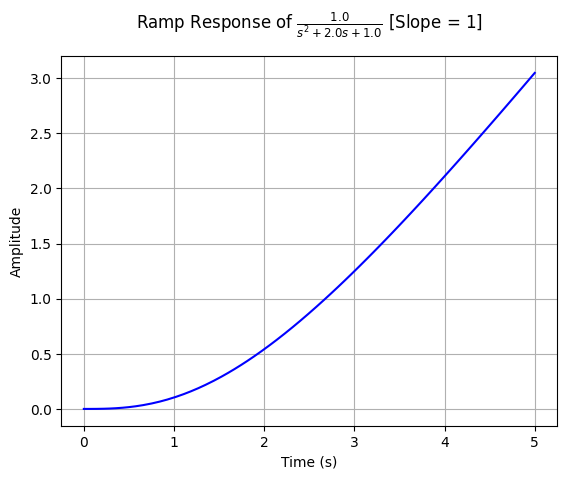

In [29]:
ramp_response_plot(tf3,upper_limit=5/(Fa.subs(values2)*W_n.subs(values2)))